**LOGISTIC REGRESSION - HEART DISEASE PREDICTION**

**Introduction:**

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source the dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables


**Source:** 
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

**Content**:

• Sex: male or female(Nominal) (binary: “1” means “male”, “0” means “female”)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• education: (1 = Primary School; 2 = High School ; 3 = Pre University; 4 = Graduate)

• Current Smoker: whether or not the patient is a current smoker (Nominal) (binary: “1”, means “Yes”, “0” means “No”)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) (binary: “1”, means “Yes”, “0” means “No”)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) (binary: “1”, means “Yes”, “0” means “No”)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) (binary: “1”, means “Yes”, “0” means “No”)

• Diabetes: whether or not the patient had diabetes (Nominal) (binary: “1”, means “Yes”, “0” means “No”)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



In [1]:
#importing necessary libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics;import warnings

In [81]:
warnings.filterwarnings("ignore")

In [3]:
#importing dataset
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [5]:
df.shape2

(4238, 16)

In [6]:
#renaming the variable male into gnder
df= df.rename(columns = {"male":"gender"})

C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

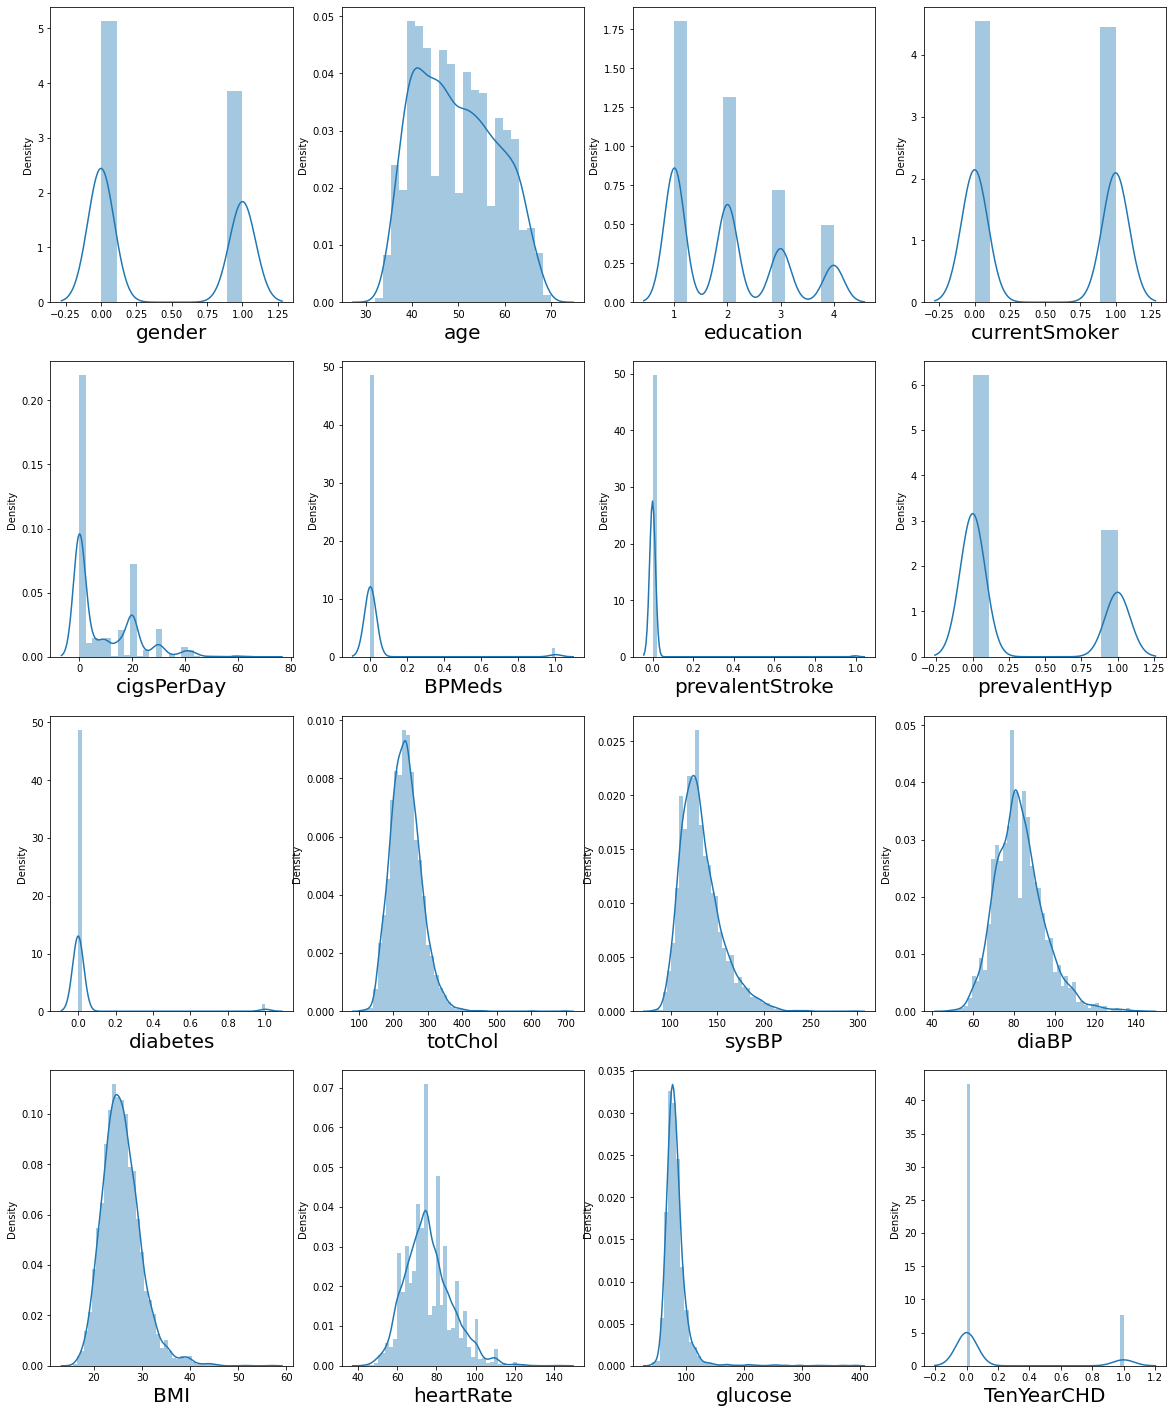

In [7]:
#Distribution of each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sb.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

All the columns are normally distributed.

In [8]:
#null values in the data
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# null value treatment
df.education = df.education.fillna(df.education.median())
df.cigsPerDay = df.cigsPerDay.fillna(df.cigsPerDay.median())
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mean())
df.totChol = df.totChol.fillna(df.totChol.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())
df.heartRate = df.heartRate.fillna(df.heartRate.mean())
df.glucose = df.glucose.fillna(df.glucose.mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

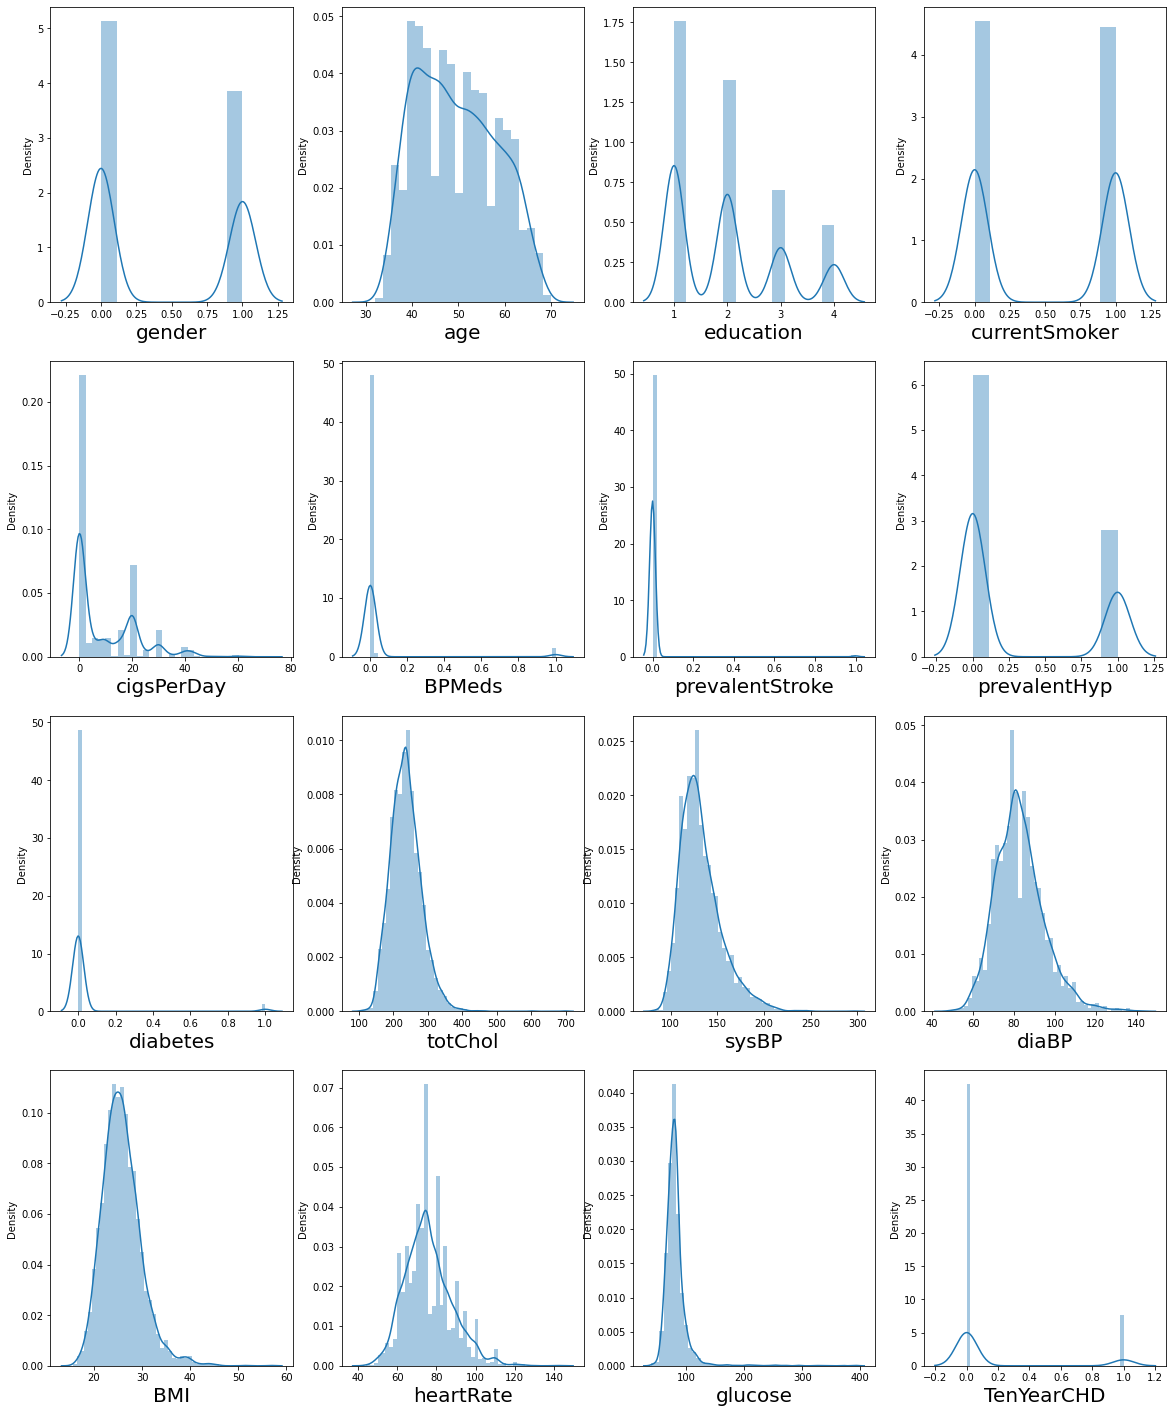

In [11]:
#ditribution of the columns after the null value treatment 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sb.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

All the columns are normally distributed.

In [12]:
#Correlation between the variables
df.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.017205,0.197596,0.315630,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.191847,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.007618,-0.010610,-0.035150,-0.081021,-0.038136,-0.022479,-0.128273,-0.061719,-0.135518,-0.053700,-0.033700,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.760239,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.315630,-0.191847,0.007618,0.760239,1.000000,-0.044826,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056650,0.058859
BPMeds,-0.052204,0.121980,-0.010610,-0.048632,-0.044826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032244,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.065046,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036150,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022479,-0.046285,-0.026816,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


In [129]:
y = df["TenYearCHD"] # target variable
X= df.drop(columns = ["TenYearCHD"]) #independent variables

In [14]:
#splitting data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 101)

In [15]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#Logistic regression
log_reg = LogisticRegression();log_reg

LogisticRegression()

In [17]:
#fitting logistic regression
log_reg.fit(X_train,Y_train)

C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test);y_pred #pridicting y variable

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
accuracy = accuracy_score(Y_test,y_pred);accuracy #Accuracy

0.8716981132075472

In [20]:
conf_mat = confusion_matrix(Y_test,y_pred);conf_mat #confusion matrix

array([[918,   3],
       [133,   6]], dtype=int64)

In [21]:
#Assigning the name for the each value of the confusion matrix
true_pos = conf_mat[0][0]
false_pos = conf_mat[0][1]
false_neg = conf_mat[1][0]
true_neg = conf_mat[1][1]

In [22]:
Accuracy = (true_pos+false_pos)/(true_pos+false_pos+false_neg+true_neg);Accuracy # Accuracy

0.8688679245283019

Identification of nearly 14% people not having 10 year risk of coronary heart disease is incorrect, and nearly 86% is
correct.

In [23]:
Recall = true_pos/(true_pos+false_neg);Recall #Recall

0.873453853472883

13% people will not have 10 year risk of coronary heart disease, in reality it is missed by our model and 87% are correctly identified.

In [24]:
Precision = true_pos/(true_pos+false_pos) ;Precision  #Precision

0.996742671009772

Label of 0.01% will not have 10 year risk of coronary heart disease and is predicted wrong, for the 99% of the people it predicted correctly.

In [25]:
f1=2*((Precision * Recall )) /(Precision + Recall);f1 #f score value

0.9310344827586206

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score

In [27]:
# Area Under Curve
auc = roc_auc_score(Y_test, y_pred) #Area under curve
auc

0.5199540693178356

In [28]:
# y prediction probability
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob

array([[0.90408836, 0.09591164],
       [0.66709534, 0.33290466],
       [0.80614853, 0.19385147],
       ...,
       [0.83913981, 0.16086019],
       [0.8089469 , 0.1910531 ],
       [0.78097673, 0.21902327]])

In [29]:
y_pred_prob[:,1]

array([0.09591164, 0.33290466, 0.19385147, ..., 0.16086019, 0.1910531 ,
       0.21902327])

In [30]:
fpr,tpr,thresholds = roc_curve(Y_test,y_pred_prob[:,1])

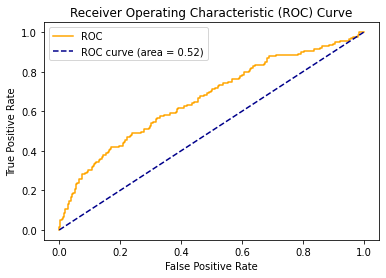

In [31]:
# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Logistic regression is not good fit model beccause AUC is 0.52

# Decision Tree

In [32]:
#importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)

1.0

In [139]:
y_pred_dt = dt.predict(X_test);y_pred_dt

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [140]:
accuracy_dt = accuracy_score(Y_test,y_pred_dt);accuracy_dt

0.7745283018867924

In [141]:
conf_mat_dt = confusion_matrix(Y_test,y_pred_dt);conf_mat_dt #confusion matrix

array([[790, 131],
       [108,  31]], dtype=int64)

In [142]:
true_pos_dt = conf_mat_dt[0][0]
false_pos_dt = conf_mat_dt[0][1]
false_neg_dt= conf_mat_dt[1][0]
true_neg_dt = conf_mat_dt[1][1]

In [146]:
Recall_dt = true_pos_dt/(true_pos_dt+false_neg_dt);Recall_dt

0.8797327394209354

In [147]:
Precision_dt = true_pos_dt/(true_pos_dt+false_pos_dt) ;Precision_dt  #Precision

0.8577633007600435

# Random Forest

In [35]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
y_pred_rand = rand_for.predict(X_test)
y_pred_rand

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
conf_mat_rand = confusion_matrix(Y_test,y_pred_rand);conf_mat_rand

array([[905,  16],
       [127,  12]], dtype=int64)

In [38]:
#Assigning the name for the each value of the confusion matrix
true_pos_rand = conf_mat_rand[0][0]
false_pos_rand = conf_mat_rand[0][1]
false_neg_rand= conf_mat_rand[1][0]
true_neg_rand = conf_mat_rand[1][1]

In [39]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rand))

Accuracy: 0.8650943396226415


In [40]:
Recall_rand = true_pos_rand/(true_pos_rand+false_neg_rand);Recall_rand

0.876937984496124

In [41]:
Precision_rand = true_pos_rand/(true_pos_rand+false_pos_rand) ;Precision_rand  #Precision

0.9826275787187839

## Hyper parameter tuning

In [42]:
grid_param = {
    "n_estimators" : [10,20,30,40],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2']
}

In [43]:
grid_search = GridSearchCV(estimator=rand_for,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [44]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=3)

In [45]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 20}

In [46]:
rand_for1 = RandomForestClassifier(criterion = "entropy", max_features = "log2", n_estimators = 30)

rand_for1.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=30)

In [47]:
y_pred_rand1 = rand_for1.predict(X_test)
y_pred_rand1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
conf_mat_rand1 = confusion_matrix(Y_test,y_pred_rand1);conf_mat_rand1 #confusion matrix

array([[901,  20],
       [130,   9]], dtype=int64)

In [49]:
true_pos_rand1 = conf_mat_rand1[0][0]
false_pos_rand1 = conf_mat_rand1[0][1]
false_neg_rand1= conf_mat_rand1[1][0]
true_neg_rand1 = conf_mat_rand1[1][1]

In [50]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rand1))

Accuracy: 0.8584905660377359


In [51]:
Recall_rand1 = true_pos_rand1/(true_pos_rand1+false_neg_rand1);Recall_rand1

0.8739088263821533

In [52]:
Precision_rand1 = true_pos_rand1/(true_pos_rand1+false_pos_rand1) ;Precision_rand1  #Precision

0.9782844733984799

# Ada Boost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [54]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)

AdaBoostClassifier()

In [55]:
y_pred_ada = ada.predict(X_test)
y_pred_ada

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
conf_mat_ada = confusion_matrix(Y_test,y_pred_ada);conf_mat #confusion matrix

array([[918,   3],
       [133,   6]], dtype=int64)

In [57]:
#Assigning the name for the each value of the confusion matrix
true_pos_ada = conf_mat_ada[0][0]
false_pos_ada = conf_mat_ada[0][1]
false_neg_ada= conf_mat_ada[1][0]
true_neg_ada = conf_mat_ada[1][1]

In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_ada))

Accuracy: 0.8603773584905661


In [59]:
Recall_ada = true_pos_ada/(true_pos_ada+false_neg_ada);Recall_ada #Recall

0.8756073858114675

In [60]:
Precision_ada = true_pos_ada/(true_pos_ada+false_pos_ada) ;Precision_ada  #Precision

0.9782844733984799

# Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [63]:
y_pred_grad = gb.predict(X_test)
y_pred_grad

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
conf_mat_grad = confusion_matrix(Y_test,y_pred_grad);conf_mat_grad #confusion matrix

array([[901,  20],
       [131,   8]], dtype=int64)

In [65]:
#Assigning the name for the each value of the confusion matrix
true_pos_grad = conf_mat_grad[0][0]
false_pos_grad = conf_mat_grad[0][1]
false_neg_grad = conf_mat_grad[1][0]
true_neg_gard = conf_mat_grad[1][1]

In [66]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_grad))

Accuracy: 0.8575471698113207


In [67]:
Recall_grad = true_pos_grad/(true_pos_grad+false_neg_grad);Recall_grad

0.873062015503876

In [68]:
Precision_grad = true_pos_grad/(true_pos_grad+false_pos_grad) ;Precision_grad

0.9782844733984799

# XG Boost

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

In [70]:
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train,Y_train)

C:\Users\Reneuit\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# cheking training accuracy
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_train,predictions)
accuracy

0.9955947136563876

In [72]:
# cheking initial test accuracy
y_pred = model.predict(X_test)
predictions1 = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test,predictions1)
accuracy

0.8462264150943396

## Hyper parameter tuning

In [73]:
param_grid={' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]}

In [74]:
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [82]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[13:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[13:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  

[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=100; total time=   0.1s
[13:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=100; total time=   0.1s
[13:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } mig

[13:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END . learning_rate=1, max_depth=5, n_estimators=10; total time=   0.0s
[13:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used 

[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=100; total time=   0.3s
[13:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=100; total time=   0.4s
[13:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } mig

[CV 4/5] END  learning_rate=1, max_depth=10, n_estimators=10; total time=   0.1s
[13:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=1, max_depth=10, n_estimators=10; total time=   0.1s
[13:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } mig

[CV 5/5] END  learning_rate=1, max_depth=10, n_estimators=100; total time=   0.5s
[13:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=1, max_depth=10, n_estimators=200; total time=   1.0s
[13:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } m

[CV 1/5] END  learning_rate=1, max_depth=20, n_estimators=50; total time=   0.6s
[13:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=1, max_depth=20, n_estimators=50; total time=   0.5s
[13:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } mig

[CV 2/5] END  learning_rate=1, max_depth=20, n_estimators=200; total time=   1.2s
[13:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END  learning_rate=1, max_depth=20, n_estimators=200; total time=   1.1s
[13:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } m

[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50; total time=   0.0s
[13:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50; total time=   0.0s
[13:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } m

[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=200; total time=   0.3s
[13:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=200; total time=   0.3s
[13:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[13:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=100; total time=   0.3s
[13:16:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only use

[CV 2/5] END  learning_rate=0.5, max_depth=10, n_estimators=10; total time=   0.0s
[13:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END  learning_rate=0.5, max_depth=10, n_estimators=10; total time=   0.0s
[13:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[CV 3/5] END  learning_rate=0.5, max_depth=10, n_estimators=100; total time=   0.6s
[13:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.5, max_depth=10, n_estimators=100; total time=   0.5s
[13:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[13:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.5, max_depth=20, n_estimators=10; total time=   0.1s
[13:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fr

[CV 5/5] END  learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.7s
[13:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=0.5, max_depth=20, n_estimators=200; total time=   1.2s
[13:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[13:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[13:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fro

[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[13:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[13:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.1s
[13:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.1s
[13:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } m

[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s
[13:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=0.1, max_depth=10, n_estimators=10; total time=   0.0s
[13:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[CV 1/5] END  learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.5s
[13:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.6s
[13:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[CV 3/5] END  learning_rate=0.1, max_depth=20, n_estimators=10; total time=   0.0s
[13:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.1, max_depth=20, n_estimators=10; total time=   0.0s
[13:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[CV 4/5] END  learning_rate=0.1, max_depth=20, n_estimators=100; total time=   0.7s
[13:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=0.1, max_depth=20, n_estimators=100; total time=   0.7s
[13:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[13:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[13:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate }

[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[13:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[13:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[13:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[13:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only use

[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.6s
[13:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.6s
[13:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[CV 5/5] END  learning_rate=0.01, max_depth=10, n_estimators=50; total time=   0.3s
[13:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.5s
[13:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rat


[13:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.1s
[13:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed 

[CV 3/5] END  learning_rate=0.01, max_depth=20, n_estimators=100; total time=   0.7s
[13:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.01, max_depth=20, n_estimators=100; total time=   0.7s
[13:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_ra

[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[13:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[13:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate

[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.4s
[13:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[13:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_ra

[13:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=50; total time=   0.1s
[13:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only us

[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.4s
[13:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.5s
[13:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_ra

[CV 5/5] END  learning_rate=0.001, max_depth=10, n_estimators=50; total time=   0.3s
[13:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END  learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.5s
[13:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_r


[13:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END  learning_rate=0.001, max_depth=20, n_estimators=10; total time=   0.1s
[13:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed

[CV 3/5] END  learning_rate=0.001, max_depth=20, n_estimators=100; total time=   0.8s
[13:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END  learning_rate=0.001, max_depth=20, n_estimators=100; total time=   0.7s
[13:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [83]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [85]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
new_model.fit(X_train, Y_train)

[13:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# cheking training accuracy
y_pred_train = new_model.predict(X_train)
accuracy_train = accuracy_score(Y_train,y_pred_train)
accuracy_train

0.8628067967275016

In [88]:
y_pred_new = new_model.predict(X_test)
accuracy_new = accuracy_score(Y_test,y_pred_new)
accuracy_new

0.8443396226415094

# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [91]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [93]:
y_pred = knn.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
knn.score(X_train,Y_train)

0.8643801132787917

In [96]:
print("The accuracy score is : ", accuracy_score(Y_test,y_pred))

The accuracy score is :  0.840566037735849


In [97]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [98]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [100]:
gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, l

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 4/5] END alg

[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=kd_tr

[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 2/5] END .algorithm=kd_t

[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=kd_tr

[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV 4/5] END ..algorithm=bru

[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.1s
[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 2/5] END ...algorithm=br

[CV 3/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 5/5] END ..algorithm=bru

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [102]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 12}

In [103]:
#use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =12)

In [105]:
knn_1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [106]:
knn_1.score(X_train,Y_train)

0.8461296412838263

In [107]:
knn_1.score(X_test,Y_test)

0.8669811320754717

# Stacking

KNN and Random Forest as Base Models and XGBoost as blending model

In [109]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [110]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [113]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8372641509433962

In [114]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8443396226415094

In [115]:
predict_val1 = knn.predict(val_train)
predict_val2 = rf.predict(val_train)

In [116]:
predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [118]:
predict_test1 = knn.predict(x_test)
predict_test2 = rf.predict(x_test)

In [119]:
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [122]:
xgb_clf = XGBClassifier()

xgb_clf.fit(predict_val,val_test)

[14:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
xgb_clf.score(predict_test,y_test)

0.8537735849056604